<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DLTensorflow/linearneuralnetworks/linearregression/Linear_Regression_Implementation_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.5 MB/s 


In [2]:
import random
import tensorflow as tf
from d2l import tensorflow as d2l

In [3]:
true_w = tf.constant([2, -3.4])
print(true_w)
print()
print(tf.reshape(true_w,(-1,1)))

tf.Tensor([ 2.  -3.4], shape=(2,), dtype=float32)

tf.Tensor(
[[ 2. ]
 [-3.4]], shape=(2, 1), dtype=float32)


In [4]:
true_b = 4.2

In [5]:
def synthetic_data(w, b, num_examples):
  X = tf.zeros((num_examples, w.shape[0]))
  X += tf.random.normal(shape=X.shape)
  y = tf.matmul(X, tf.reshape(true_w,(-1,1))) + b
  y += tf.random.normal(shape=y.shape, stddev=0.01)
  y = tf.reshape(y, (-1, 1))
  return X, y

features, labels = synthetic_data(true_w, true_b, 1000)
print(features.shape)
print()
print(labels.shape)

(1000, 2)

(1000, 1)


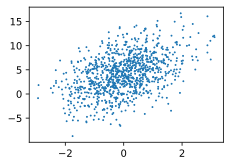

In [6]:
# First Feature
d2l.set_figsize()
d2l.plt.scatter(features[:,0].numpy(), labels.numpy(), 1)

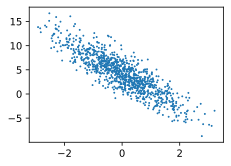

In [7]:
# second Feature
d2l.set_figsize()
d2l.plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

In [8]:
num_examples = len(features)
indices = list(range(num_examples))
# The examples are read at random, in no particular order
random.shuffle(indices)
print(indices)
print()
j = tf.constant(indices[0:min(0 + 10, num_examples)])
print(j)
print()
print(tf.gather(features, j), tf.gather(labels, j))

[536, 653, 507, 921, 533, 23, 429, 671, 302, 792, 335, 831, 228, 457, 750, 895, 256, 779, 644, 836, 632, 705, 336, 305, 673, 107, 50, 210, 209, 857, 102, 826, 583, 461, 575, 242, 854, 715, 493, 865, 96, 311, 558, 415, 397, 354, 183, 869, 660, 948, 178, 698, 269, 131, 318, 603, 85, 185, 618, 349, 514, 628, 638, 933, 351, 382, 691, 706, 612, 244, 356, 535, 675, 42, 4, 477, 611, 798, 813, 680, 833, 441, 30, 807, 920, 905, 748, 471, 476, 281, 59, 847, 31, 637, 672, 45, 984, 547, 169, 543, 815, 279, 464, 489, 746, 5, 598, 718, 966, 980, 375, 6, 432, 852, 972, 26, 674, 498, 861, 737, 217, 646, 510, 353, 676, 619, 968, 513, 19, 216, 487, 940, 577, 449, 135, 571, 368, 617, 409, 951, 251, 859, 964, 989, 165, 214, 652, 590, 716, 855, 976, 445, 593, 486, 303, 927, 326, 248, 390, 358, 851, 662, 111, 327, 581, 469, 455, 22, 769, 866, 624, 122, 273, 490, 765, 939, 99, 994, 465, 978, 810, 231, 406, 427, 518, 310, 703, 198, 679, 896, 383, 930, 174, 495, 741, 785, 301, 657, 665, 361, 300, 755, 36, 483,

In [9]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = tf.constant(indices[i:min(i + batch_size, num_examples)])
    yield tf.gather(features, j), tf.gather(labels, j)

In [10]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean = 0, stddev=0.01), trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [11]:
def linreg(X, w, b):
  return tf.matmul(X, w) + b

In [12]:
def squared_loss(y_hat, y):
  return (y_hat - tf.reshape(y, y_hat.shape))**2/2

In [13]:
def sgd(params, grads, lr, batch_size):
  for param, grad in zip(params, grads):
    param.assign_sub(lr*grad/batch_size)

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    with tf.GradientTape() as g:
      l = loss(net(X, w, b), y)
    dw, db = g.gradient(l, [w, b])
    sgd([w, b], [dw, db], lr, batch_size)
  train_l = loss(net(features, w, b), labels)
  print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.037139
epoch 2, loss 0.000145
epoch 3, loss 0.000052


In [15]:
print(f'true_w: {true_w}')
print()
print(f'w: {w}')
print()
print(f'true_b: {true_b}')
print(f'b: {b}')

true_w: [ 2.  -3.4]

w: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 2.0001419],
       [-3.3990543]], dtype=float32)>

true_b: 4.2
b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.1993184], dtype=float32)>
